In [1]:
import os

os.chdir("../..")

In [2]:

from datetime import datetime, timezone
from typing import Dict, List, Literal, cast
import os 
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_openai import ChatOpenAI as LangchainChatOpenAI
from langchain_core.messages import AIMessage
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from pydantic import BaseModel, Field
from typing import Any, List, Optional, Union
from typing_extensions import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from dataclasses import dataclass, field
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI as LangchainChatDeepSeek
from langchain_core.prompts import MessagesPlaceholder
from langchain.schema import HumanMessage, SystemMessage, AIMessage  # Import AIMessage for assistant responses
from langgraph.checkpoint.memory import MemorySaver
import logging
from app.react_agent.agents import *
from app.react_agent.tools import *
from app.react_agent.prompts import *
from app.react_agent.state import *
from app.react_agent.graph import graph

from langchain.agents import AgentExecutor
from langgraph.prebuilt import create_react_agent
from langchain.tools import BaseTool, Tool
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from langgraph.prebuilt import tools_condition
from dotenv import load_dotenv
from datetime import date
import logging
import warnings
# import shutil
import uuid

from app.react_agent.tools import (team_tools, player_tools,
                                   game_data_tools, game_info_tools)

from app.react_agent.prompts import (TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, 
                                     MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT)

# Suppress debug messages from ipywidgets
logging.getLogger('ipywidgets').setLevel(logging.WARNING)
logging.getLogger('comm').setLevel(logging.WARNING)
logging.getLogger('tornado').setLevel(logging.WARNING)
logging.getLogger('traitlets').setLevel(logging.WARNING)
logging.disable(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL, handlers=[logging.NullHandler()])
warnings.filterwarnings("ignore")

load_dotenv()

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'


True

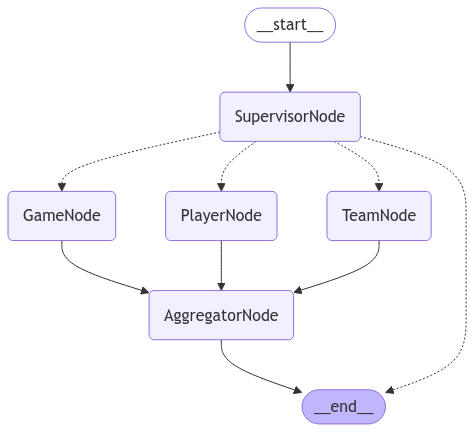

In [3]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [4]:

# user_input = """Summarise the rule Rule 5.01 to 5.02(c) of the MLB official Baseball rules? Also, explain Appendix 5 of the rule book.
#             """

# user_input = "tell me about the games played by the Minnesota Twins in the last 5 days. today is Jan 30 2025"

user_input = "Who are the highest scoring players in the last 5 games of the Minnesota Twins?"
# user_input = "what do you know about Jorge Alcala last performance, and how did he perform in the last game?"   
input_state = {"messages": [HumanMessage(content=user_input)]}

thread_id = str(uuid.uuid4())
config = {
    "configurable": {
        "thread_id": thread_id,  # Ensure this is correctly set
        "checkpoint_ns": "some_namespace",  # Add a valid namespace
        "checkpoint_id": str(uuid.uuid4()),  # Generate a unique checkpoint ID
        "recursion_limit": 3000 
    }
}

# **Graph Invocation**
output = graph.invoke(input_state, {"recursion_limit": 30} )      

ValueError: Single '}' encountered in format string

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import SystemMessage
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults

# from langchain.agents import create_react_agent, AgentExecutor
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import AIMessage, HumanMessage

team_tools = [mlb_get_team_id_tool, mlb_get_team_roster_tool, mlb_get_team_info_tool]




# Initialize the language model
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# Partial the prompt with tools and tool names
prompt = revised_team_prompt.partial(
    tools="\n".join([f"- {tool.name}: {tool.description}" for tool in team_tools]),
    tool_names=", ".join([tool.name for tool in team_tools])
)

# Create the React agent
agent = create_react_agent(
    model=llm, 
    tools=team_tools, 
    prompt=prompt
)

# graph = StateGraph()
# graph.add_node("agent_node", agent)

query = "Tell me about the performance of Pittsburgh Pirates in the 2024 season" 

messages = agent.invoke({"messages": [("human", query)]})
print(
    {
        "input": query,
        "output": messages["messages"][-1].content,
    }
)



{'input': 'Tell me about the performance of Pittsburgh Pirates in the 2024 season', 'output': 'The Pittsburgh Pirates are a Major League Baseball team that plays in the National League Central Division. Here is some detailed information about the team for the 2024 season:\n\n- **Team Name**: Pittsburgh Pirates\n- **Abbreviation**: PIT\n- **Location**: Pittsburgh\n- **Venue**: PNC Park\n- **League**: National League\n- **Division**: National League Central\n- **First Year of Play**: 1882\n- **Spring League**: Grapefruit League\n\nUnfortunately, the tool used does not provide specific performance metrics such as win-loss records or standings for the 2024 season. For detailed performance statistics, you might need to refer to sports news websites or databases that track MLB season performances.\n\nIf you have any other questions or need further assistance, feel free to ask!'}


> Set this 

In [39]:
import os

os.getcwd()

'c:\\Users\\pault\\Documents\\3. AI and Machine Learning\\2. Deep Learning\\1c. App\\Projects\\Sports_AI\\app\\react_agent'

> MLB

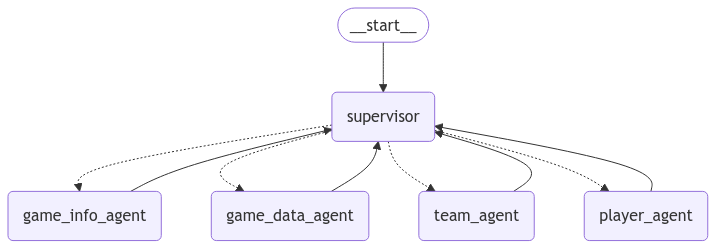

In [ ]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
from app.react_agent.tools import team_tools, player_tools, game_info_tools, game_data_tools
from app.react_agent.prompts import TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT
from langgraph.graph import StateGraph, START, END

llm = ChatOpenAI(model="gpt-4o")

team_agent = create_react_agent(
    model=llm,
    tools=team_tools,
    name="team_agent",
    prompt= TEAM_PROMPT
)

player_agent = create_react_agent(
    model=llm,
    tools=player_tools,
    name="player_agent",
    prompt=PLAYER_PROMPT
)

game_info_agent = create_react_agent(
    model=llm,
    tools=game_info_tools,
    name="game_info_agent",
    prompt=GAME_INFO_PROMPT
)

game_data_agent = create_react_agent(
    model=llm,
    tools=game_data_tools,
    name="game_data_agent",
    prompt=GAME_DATA_PROMPT
)


# Create supervisor workflow
mlb_workflow = create_supervisor(
    [team_agent, player_agent, game_data_agent, game_info_agent],
    model=llm,
    prompt=MAIN_SUPERVISOR_PROMPT
)

# Compile and run
app = mlb_workflow.compile()

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [7]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Tell me about the performance of Pittsburgh Pirates in the 2024 season"
        }
    ]
})


In [8]:
result

{'messages': [HumanMessage(content='Tell me about the performance of Pittsburgh Pirates in the 2024 season', additional_kwargs={}, response_metadata={}, id='d936d498-e83c-42ec-a17b-229e16e4565a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0c6liMs1OfrCB0m9RCFrSuVQ', 'function': {'arguments': '{}', 'name': 'transfer_to_team_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 494, 'total_tokens': 507, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-c10e3b0d-e574-4951-b9e2-9276ed85d650-0', tool_calls=[{'name': 'transfer_to_team_agent', 'args': {}, 'id': 'call_0c6liMs1OfrCB0m9RCFrSuVQ',

> NBA

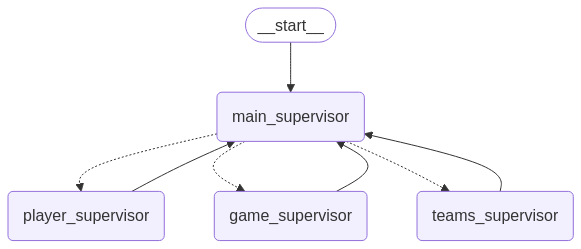

In [3]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
from app.react_agent.tools import team_tools, player_tools, game_info_tools, game_data_tools
from app.react_agent.prompts import TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT
from app.react_agent.prompts import *
from app.react_agent.tools import *
from langgraph.graph import StateGraph, START, END

llm = ChatOpenAI(model="gpt-4o")


# -------------------------------- GAMES--------------------------------
live_game_agent = create_react_agent(
    model=llm,
    tools=[nba_live_scoreboard, nba_live_boxscore , nba_live_play_by_play],
    name="live_game_agent",
    prompt= LIVE_GAME_PROMPT
)

game_scheduling_agent = create_react_agent(
    model=llm,
    tools=[nba_list_todays_games, nba_live_scoreboard, tavily_search_tool],
    name="game_scheduling_agent",
    prompt=GAME_SCHEDULING_PROMPT
)

team_game_logs_agent = create_react_agent(
    model=llm,
    tools=[nba_team_game_logs, nba_team_game_logs_by_name, nba_fetch_game_results], # add nba_fetch_game_results
    name="team_game_logs_agent",
    prompt=TEAM_GAME_LOGS_PROMPT
)

game_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="game_online_agent",
    prompt=GAME_ONLINE_PROMPT
)

# Create supervisor for games
game_supervisor = create_supervisor(
    [live_game_agent, game_scheduling_agent, team_game_logs_agent, game_online_agent],
    supervisor_name = "game_supervisor",
    model=llm,
    prompt=GAME_SUPERVISOR_PROMPT
).compile(name = "game_supervisor")


# -------------------------------- PLAYERS--------------------------------

player_info_agent = create_react_agent(
    model=llm,
    tools=[nba_search_players, nba_common_player_info, nba_list_active_players],
    name="player_info_agent",
    prompt= PLAYER_INFO_PROMPT
)

player_stats_agent = create_react_agent(
    model=llm,
    tools=[nba_search_players, nba_player_career_stats, nba_player_game_logs],
    name="player_stats_agent",
    prompt=PLAYER_STATS_PROMPT
)

player_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="player_online_agent",
    prompt=PLAYER_ONLINE_PROMPT
)

# Create supervisor for games
player_supervisor = create_supervisor(
    [player_info_agent, player_stats_agent, player_online_agent],
    supervisor_name = "player_supervisor",
    model=llm,
    prompt=PLAYER_SUPERVISOR_PROMPT
).compile(name = "player_supervisor")


# -------------------------------- TEAMS --------------------------------


team_game_logs_agent = create_react_agent(
    model=llm,
    tools=[nba_team_game_logs, nba_team_game_logs_by_name, nba_fetch_game_results], # add nba_fetch_game_results
    name="team_game_logs_agent",
    prompt=TEAM_GAME_LOGS_PROMPT
)

team_stats_agent = create_react_agent(
    model=llm,
    tools=[nba_team_standings, nba_team_stats_by_name, nba_all_teams_stats],
    name="team_stats_agent",
    prompt=TEAM_STATS_PROMPT
)

team_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="team_online_agent",
    prompt=TEAM_ONLINE_PROMPT
)

# Create supervisor for games
teams_supervisor = create_supervisor(
    [team_game_logs_agent, team_online_agent, team_stats_agent],
    supervisor_name = "teams_supervisor",
    model=llm,
    prompt=TEAM_SUPERVISOR_PROMPT
).compile(name = "teams_supervisor")



# -------------------------------- MAIN SUPERVISOR --------------------------------
main_supervisor = create_supervisor(
    [game_supervisor, player_supervisor, teams_supervisor],
    supervisor_name = "main_supervisor",
    # output_mode = "last_message",
    model=llm,
    prompt=NBA_SUPERVISOR_PROMPT
).compile(name = "main_supervisor")

display(
    Image(
        main_supervisor.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [12]:
input_text = "If LA Lakers made it to the playoffs right now, who would be their top scorer, and who are they likely to play with?"


result = main_supervisor.invoke({
    "messages": [
        {
            "role": "user",
            "content": input_text + " today is: " + datetime.datetime.now().isoformat()
        }
    ]
})


result

{'messages': [HumanMessage(content='If LA Lakers made it to the playoffs right now, who would be their top scorer, and who are they likely to play with? today is: 2025-03-02T10:42:53.536378', additional_kwargs={}, response_metadata={}, id='3073f828-7dc0-4cb7-a359-e5331f5e21d7'),
  AIMessage(content='The query regarding who the LA Lakers might play against in the playoffs falls under game-related queries regarding game matchups and schedules. Thus, I will initially route this part to the **game_supervisor**. However, the question about who would be the top scorer for the LA Lakers involves player-specific performance details, so I will need clarification for this part or you need to visit The **player_supervisor**  for player performance statistics.\n\nLet me start by addressing the playoff matchup aspect with the **game_supervisor**.', additional_kwargs={'tool_calls': [{'id': 'call_IPdxBfpVKQOafPJxVZWznMw9', 'function': {'arguments': '{}', 'name': 'transfer_to_game_supervisor'}, 'type'

In [30]:
from typing import List, Dict, Any, Optional, Sequence, TypedDict, Annotated
from pydantic import BaseModel, Field, field_validator
from langchain_core.tools import StructuredTool
from nba_api.stats.endpoints import leaguestandingsv3, teamyearbyyearstats, leaguegamefinder
from nba_api.stats.static import teams
from nba_api.stats.library.parameters import SeasonTypeAllStar, SeasonYear, Season, PerModeSimple
import pandas as pd
from datetime import datetime, timedelta
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
# from langgraph.prebuilt import create_function_calling_executor  # Correct import
from langgraph.graph import END, StateGraph
import operator
import asyncio


# --- Define the AgentState (same as before, but reproduced for completeness) ---
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    # The 'add_messages' key is crucial:  It tells LangGraph
    # to *append* new messages to the existing list, rather than
    # overwriting it.  Without this, your history will be lost.
    # The `operator.add` function is a standard Python function
    # that performs list concatenation.
    sub_queries: Optional[List[str]] = None
    current_query: Optional[str] = None
    agent_index: Optional[int] = None



async def split_node(state: AgentState) -> Dict[str, List[str]]:
    """
    Splits the user's input query into two sub-queries focused on different NBA areas.

    Args:
        state: The current agent state, containing the user's message.

    Returns:
        A dictionary containing a list of sub-queries.
    """

    class ParsedOutput(BaseModel):
        sub_queries: List[str] = Field(..., description="A list of at most two sub-queries derived from the user's input. Each sub-query should focus on a single NBA area (game, player, or team).")

    llm = ChatOpenAI(model="gpt-4o", temperature=0) # Moved LLM definition here
    llm_with_structure = llm.with_structured_output(ParsedOutput)

    prompt = PromptTemplate(
        template="""
        You are an advanced NBA assistant responsible for breaking down user's queries into one or two sub-queries to make it easy for specialized agents to answer.

        Each sub-query will be processed in parallel by different agents within the NBA assistant system.

        The NBA assistant system has three main areas of expertise:

        1.  **game_supervisor**: Handles queries related to NBA games, including live games, game schedules, and team game logs.
        2.  **player_supervisor**: Handles queries related to NBA players, including biographical information, career statistics, and general player information.
        3.  **teams_supervisor**: Handles queries related to NBA teams, including general team information and team game logs.

        ### INSTRUCTIONS:
        1. Analyze the user's query: `{query}`.
        2. Determine if the query can be answered by a single area of expertise (game, player, or team).
           - If it can, rephrase the query to be as specific as possible for that area.  Return a list containing *only* this single rephrased query.
        3. If the query requires information from *two* different areas of expertise, break it down into *two* sub-queries, each focused on one of the areas.
           - Ensure each sub-query is clear, concise, and answerable by the corresponding supervisor.
           - Return a list containing these two sub-queries.
        4.  Do NOT create more than two sub-queries.
        5.  The sub-queries should be as independent as possible.
        6.  Return a JSON object with a single key 'sub_queries' which is a list of strings.

        ### Example 1:
        User Query: If LA Lakers made it to the playoffs right now, who would be their top scorer, and who are they likely to play with?
        Output: {{"sub_queries": ["Who are the top scorers for the LA Lakers?", "Who are the LA Lakers likely to play in the playoffs?"]}}

        ### Example 2:
        User Query: What is the height of LeBron James, and how many points does he average per game?
        Output: {{"sub_queries": ["What is LeBron James' height?", "What are LeBron James' career points per game?"]}}

        ### Example 3:
        User Query: What's the score of the Lakers game?
        Output: {{"sub_queries": ["What's the score of the Lakers game right now?"]}}

        ### Example 4:
        User Query:  When do the Knicks play next?
        Output:  {{"sub_queries": ["When do the Knicks play next?"]}}
        """,
        input_variables=["query"]
    )

    # Create the chain
    chain = prompt | llm_with_structure

    # Extract the user's query from state.messages
    query = state["messages"][-1].content  # Get the *last* message's content

    # Invoke the chain to generate the structured output
    structured_output = await chain.ainvoke({"query": query})  # Use .ainvoke for async

    return {"sub_queries": structured_output.sub_queries}



async def combine_results(state: AgentState) -> Dict[str, List[BaseMessage]]:
    """Combines results from parallel runs and presents to LLM for final answer"""
    final_results = []
    for i in range(1, len(state["messages"])):
        # Accessing the content attribute of the AIMessage object
        final_results.append(state["messages"][i].content)  # Correctly access content

    combined_results_str = "\n\n".join(final_results) # Join for final LLM call

    # Use a separate LLM for final answer generation
    final_llm = ChatOpenAI(model="gpt-4o", temperature=0)
    final_prompt = PromptTemplate(
        template="""You are an expert NBA assistant.  
        
        Here is the original user query:
        
        {original_query}
        
        Here are the results from parallel investigations into sub-queries:
        
        {combined_results}
        
        Based on this information, provide a comprehensive and accurate answer to the original user query.
        """,
        input_variables=["original_query", "combined_results"]
    )
    final_chain = final_prompt | final_llm
    final_answer = await final_chain.ainvoke({"original_query": state["messages"][0].content, "combined_results": combined_results_str})

    # Create a new list of messages, starting with the original query
    new_messages = [state["messages"][0], HumanMessage(content=final_answer.content)]


    return {"messages": new_messages}



# --- Workflow Definition (using LangGraph) ---

async def run_agent(state: AgentState, agent_executor) -> AgentState:  # Async function
    """Runs an agent executor and updates the state."""
    
    # Extract the sub-query for this particular parallel run.
    # The index is stored in the 'agent_index' key within the state.
    sub_query = state['current_query']
    current_date = datetime.now().isoformat()  # Get the current date

    # Prepare the input for the agent executor.  We take the original messages
    # Add the date context to the sub-query.
    agent_input = {
        "messages": state["messages"][:1] + [HumanMessage(content=f"{sub_query} Today is: {current_date}")],
    }
    
    # Invoke the agent executor.  The result will be a dictionary.
    response = await agent_executor.ainvoke(agent_input) # Await the result

    # Return the new state, appending the result from this agent run.
    return {
        "messages": [response['messages'][-1]],  # Append *only* the agent's final response
    }


async def parallel_runner(state: AgentState, agent_executors: List) -> Dict[str, List[BaseMessage]]:
    """Runs multiple agent executors in parallel."""
    # Create a list to hold the futures for each agent run.
    coroutines = []

    #Iterate the sub queries
    for i, sub_query in enumerate(state["sub_queries"]):

        # Make sure index does not go out of range
        agent_index = i % len(agent_executors)
        
        # Each agent will now process a dedicated sub-query.
        updated_state = {**state, "current_query": sub_query, "agent_index": agent_index}  # Add the index to the state
        
        # Start the agent run and add the future to our list.
        coroutine = run_agent(updated_state, agent_executors[agent_index])
        coroutines.append(coroutine)

    # Run all agent calls concurrently and gather the results.
    results = await asyncio.gather(*coroutines)

    all_messages = []
    for result in results:
            all_messages.extend(result["messages"]) # Collect all the messages

    return {
        "messages": all_messages
    }

#--- Main Entrypoint and Workflow Compilation ---
async def parallel_agents_node(state: AgentState, agent_executors: List) -> Dict[str, List[BaseMessage]]: #Added agent_executor here
    return await parallel_runner(state, agent_executors)

async def main(query: str, agent_executors: List) -> Dict:
    """
    Main entry point for the multi-agent workflow.

    Args:
        query: The user's input query.
        agent_executors: A *list* of compiled agent executors.

    Returns:
        The final state of the workflow.
    """

    # Initialize the agent's state with the user's query.
    initial_state = {"messages": [HumanMessage(content=query)]}

    # Create the workflow graph
    workflow = StateGraph(AgentState)

    # Add nodes:
    workflow.add_node("split_query", split_node)  # Node to split the query
    workflow.add_node("parallel_agents", lambda state, executors=agent_executors: asyncio.run(parallel_runner(state, executors))) # Node to run agents. Added agent_executors
    workflow.add_node("combine_results", combine_results)  # Node to combine results

    # Define edges:
    workflow.add_edge(START, "split_query")
    workflow.add_edge("split_query", "parallel_agents")
    workflow.add_edge("parallel_agents", "combine_results")
    workflow.add_edge("combine_results", END)

    # Compile the graph
    app = workflow.compile()

    # Invoke the workflow with the initial state
    final_state = await app.ainvoke(initial_state)  # Use .ainvoke for async
    return final_state


# Example Usage (assuming you have game_supervisor, player_supervisor, teams_supervisor already compiled)

if __name__ == "__main__":
    async def run_example():
        # Create a list of supervisors (replace with your actual compiled supervisors)
        agent_executors = [
            game_supervisor,
            player_supervisor,
            teams_supervisor
        ]

        # Example user query
        # user_query = "If LA Lakers made to playoffs right now, who would be their top scorer, and who are they likely to play with?"
        user_query = "Who is likely to win the MVP this season, back up with stats?"
        # Run the workflow and get the final result
        final_result = await main(user_query, agent_executors)
        print("----FINAL RESULT----")
        print (final_result['messages'][-1].content)


    asyncio.run(run_example())

----FINAL RESULT----
Based on the current player statistics and season performances, the leading candidates for the NBA MVP in the 2024-2025 season are Shai Gilgeous-Alexander, Nikola Jokic, Giannis Antetokounmpo, Luka Doncic, and Jayson Tatum. Here's a breakdown of why each player is a strong contender:

1. **Shai Gilgeous-Alexander**: He is currently leading the MVP race according to various odds from platforms like DraftKings. His standout performances and ability to lead his team effectively have made him a top favorite in multiple analyses.

2. **Nikola Jokic**: Jokic is known for his consistent and dominant performances. This season, he is averaging 29.2 points per game and 12.6 rebounds per game, showcasing his all-around impact on the court. His past MVP titles and current season statistics make him a formidable candidate.

3. **Giannis Antetokounmpo**: Giannis is frequently mentioned in MVP discussions due to his significant impact on both ends of the court and his ability to 

> SOCCER

In [ ]:
# -------------------------------- League --------------------------------

league_info_agent = create_react_agent(
    model=llm,
    tools=[get_league_id_by_name, get_league_info, tavily_search_tool],
    name="league_info_agent",
    prompt= LEAGUE_INFO_PROMPT
)

league_standings_agent = create_react_agent(
    model=llm,
    tools=[get_league_id_by_name, get_standings, tavily_search_tool],
    name="league_standings_agent",
    prompt=LEAGUE_STANDINGS_PROMPT
)

league_fixtures_agent = create_react_agent(
    model=llm,
    tools=[get_league_schedule_by_date, tavily_search_tool],
    name="league_fixtures_agent",
    prompt=LEAGUE_FIXTURES_PROMPT
)

# Create supervisor for games
league_supervisor = create_supervisor(
    [league_info_agent, league_standings_agent, league_fixtures_agent],
    supervisor_name = "league_supervisor",
    model=llm,
    prompt=LEAGUE_SUPERVISOR_PROMPT
).compile()


# -------------------------------- TEAM --------------------------------

team_info_agent = create_react_agent(
    model=llm,
    tools=[get_team_info,  tavily_search_tool],
    name="team_info_agent",
    prompt= TEAM_INFO_PROMPT
)

team_fixtures_agent = create_react_agent(
    model=llm,
    tools=[get_team_fixtures, get_team_fixtures_by_date_range, tavily_search_tool],
    name="team_fixtures_agent",
    prompt=TEAM_FIXTURES_PROMPT
)

# Create supervisor for games
team_soccer_supervisor = create_supervisor(
    [team_info_agent, team_fixtures_agent],
    supervisor_name = "team_soccer_supervisor",
    model=llm,
    prompt=TEAM_SUPERVISOR_PROMPT
).compile()


# -------------------------------- PLAYERS--------------------------------

player_id_agent = create_react_agent(
    model=llm,
    tools=[get_player_id, get_player_profile, tavily_search_tool],
    name="player_id_agent",
    prompt= PLAYER_ID_PROMPT
)

player_soccer_stats_agent = create_react_agent(
    model=llm,
    tools=[get_player_id, get_player_statistics, tavily_search_tool],  # add get_league_id_by_name for get_player_statistics_2
    name="player_soccer_stats_agent",
    prompt=PLAYER_SOCCER_STATS_PROMPT
)


player_soccer_stats_agent_2 = create_react_agent(
    model=llm,
    tools=[get_player_id, get_league_id_by_name, get_player_statistics_2],  # add get_league_id_by_name for get_player_statistics_2
    name="player_soccer_stats_agent_2",
    prompt=PLAYER_SOCCER_STATS_PROMPT_2
)

# Create supervisor for games
player_soccer_supervisor = create_supervisor(
    [player_id_agent, player_soccer_stats_agent, player_soccer_stats_agent_2],
    supervisor_name = "player_soccer_supervisor",
    model=llm,
    prompt=PLAYER_SOCCER_SUPERVISOR_PROMPT
).compile()




# -------------------------------- FIXTURES --------------------------------

live_match_agent = create_react_agent(
    model=llm,
    tools=[get_live_match_for_team, get_live_stats_for_team, get_live_match_timeline],
    name="live_match_agent",
    prompt= LIVE_MATCH_PROMPT
)

fixture_schedule_agent = create_react_agent(
    model=llm,
    tools=[get_league_schedule_by_date, tavily_search_tool],
    name="fixture_schedule_agent",
    prompt=FIXTURE_SCHEDULE_PROMPT
)

team_fixtures_agent = create_react_agent(
    model=llm,
    tools=[get_team_fixtures, get_team_fixtures_by_date_range, tavily_search_tool],
    name="team_fixtures_agent",
    prompt=TEAM_FIXTURES_PROMPT
)

match_analysis_agent = create_react_agent(
    model=llm,
    tools=[get_fixture_statistics, get_league_schedule_by_date, get_multiple_fixtures_stats], # to get fixture_id use get_league_schedule_by_date
    name="match_analysis_agent",
    prompt=MATCH_ANALYSIS_PROMPT
)

# Create supervisor for games
fixture_supervisor = create_supervisor(
    [live_match_agent, player_stats_agent, player_online_agent, team_fixtures_agent],
    supervisor_name = "fixture_supervisor",
    model=llm,
    prompt=FIXTURE_SUPERVISOR_PROMPT
).compile()


# -------------------------------- MAIN SUPERVISOR --------------------------------
main_soccer_supervisor = create_supervisor(
    [league_supervisor, fixture_schedule_agent, match_analysis_agent, fixture_supervisor],
    supervisor_name = "main_soccer_supervisor",
    model=llm,
    prompt=SOCCER_SUPERVISOR_PROMPT
).compile()

display(
    Image(
        main_soccer_supervisor.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)





In [ ]:


result = main_soccer_supervisor.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Tell me about the performance of Pittsburgh Pirates in the 2024 season"
        }
    ]
})


result

In [44]:
# list all nba teams
teams_list = ["Cleveland Cavaliers", "Golden State Warriors", "Los Angeles Lakers", "Miami Heat", "New York Knicks", 
              "Oklahoma City Thunder", "Orlando Magic", "Toronto Raptors", "Washington Wizards", "Atlanta Hawks", "Boston Celtics", 
              "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", 
              "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Memphis Grizzlies", "Milwaukee Bucks", "Minnesota Timberwolves", 
              "New Orleans Pelicans", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings", 
              "San Antonio Spurs", "Utah Jazz"]

# List all WNBA teams
wnba_teams_list = ["Atlanta Dream", "Chicago Sky", "Connecticut Sun", "Dallas Wings", "Indiana Fever", "Las Vegas Aces", 
                   "Los Angeles Sparks", "Minnesota Lynx", "New York Liberty", "Phoenix Mercury", "Seattle Storm", "Washington Mystics"]


In [48]:
from nba_api.stats.static import teams

# ========== 1) Define Input Schema ==========
class SearchTeamsByNameInput(BaseModel):
    name_query: str = Field(
        ...,
        description="Full or partial team name (e.g. 'Lakers', 'Cavaliers')."
    )

# ========== 2) Define the Tool Class ==========
class NBATeamSearchTool:
    """
    Searches NBA teams by partial or full name using the static library in nba_api.
    """
    def __init__(self):
        pass

    def run(self, name_query: str) -> List[Dict[str, Any]]:
        """
        Returns a list of team dicts:
        [
          {
            'id': <team_id>,
            'full_name': 'Los Angeles Lakers',
            'abbreviation': 'LAL',
            'nickname': 'Lakers',
            'city': 'Los Angeles',
            'state': 'California',
            'year_founded': 1948
          },
          ...
        ]
        """
        try:
            results = teams.find_teams_by_full_name(name_query)
            return results
        except Exception as e:
            return [{"error": str(e)}]

# ========== 3) Create the LangChain StructuredTool ==========
nba_search_teams = StructuredTool(
    name="nba_search_teams",
    description=(
        "Search NBA teams by partial or full name. "
        "Returns a list of matches with 'id' used as 'team_id'."
    ),
    func=NBATeamSearchTool().run,
    args_schema=SearchTeamsByNameInput
)

input_data = {"name_query": "Lakers"}
nba_search_teams.run(input_data)

[{'id': 1610612747,
  'full_name': 'Los Angeles Lakers',
  'abbreviation': 'LAL',
  'nickname': 'Lakers',
  'city': 'Los Angeles',
  'state': 'California',
  'year_founded': 1948}]